In [20]:
import numpy as np
from graphs_utils import generate_graphs_for_data
import matplotlib.pyplot as plt
import seaborn as sns

# My modules
from generator import LCGenerator, MTGenerator

# Generator Test
This notebook will be testing the correctness and quality of the generator objects that generates random numbers from various distributions.

# Will be using tests to find out how random the numbers really are

In [30]:
lc_gen = LCGenerator(12345)
mt_gen = MTGenerator(12345)

In [31]:
n2 = 1000
start = 0
end = 100
random_doubles_mt = np.array([mt_gen.next_double_from_to(end=end) for _ in range(0, n2)])

random_doubles_lc = np.array([lc_gen.next_double_from_to(end=end) for _ in range(0, n2)])

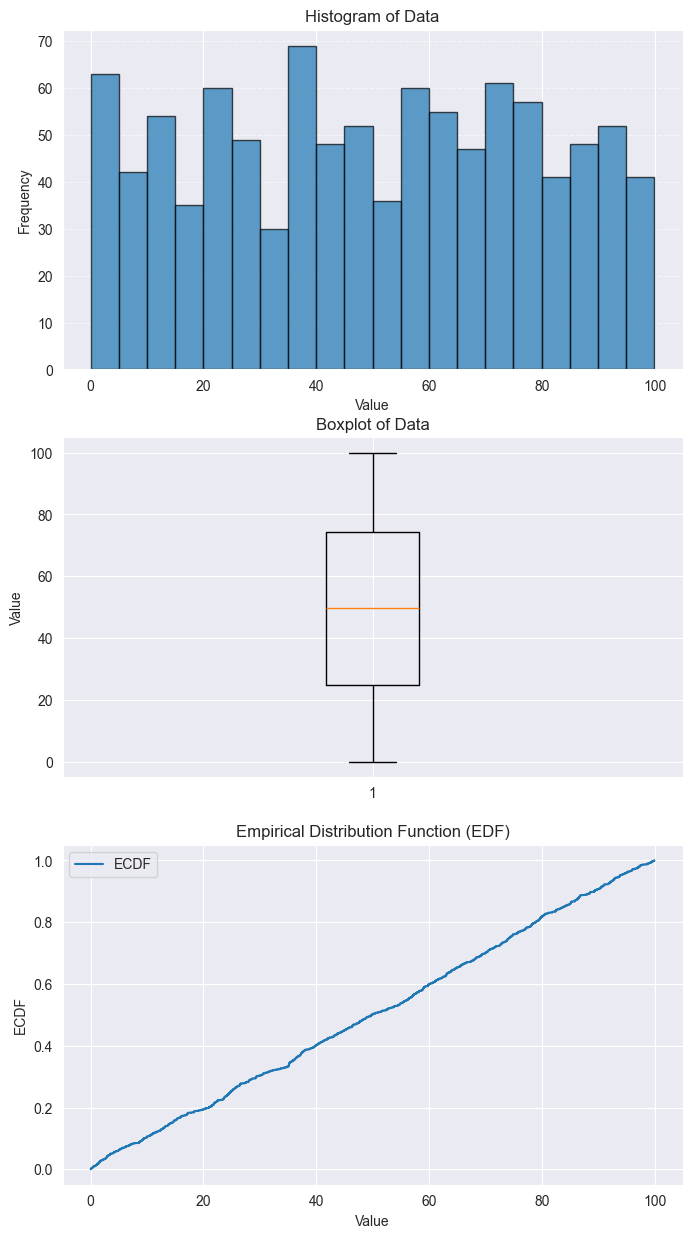

In [33]:
generate_graphs_for_data(random_doubles_lc)

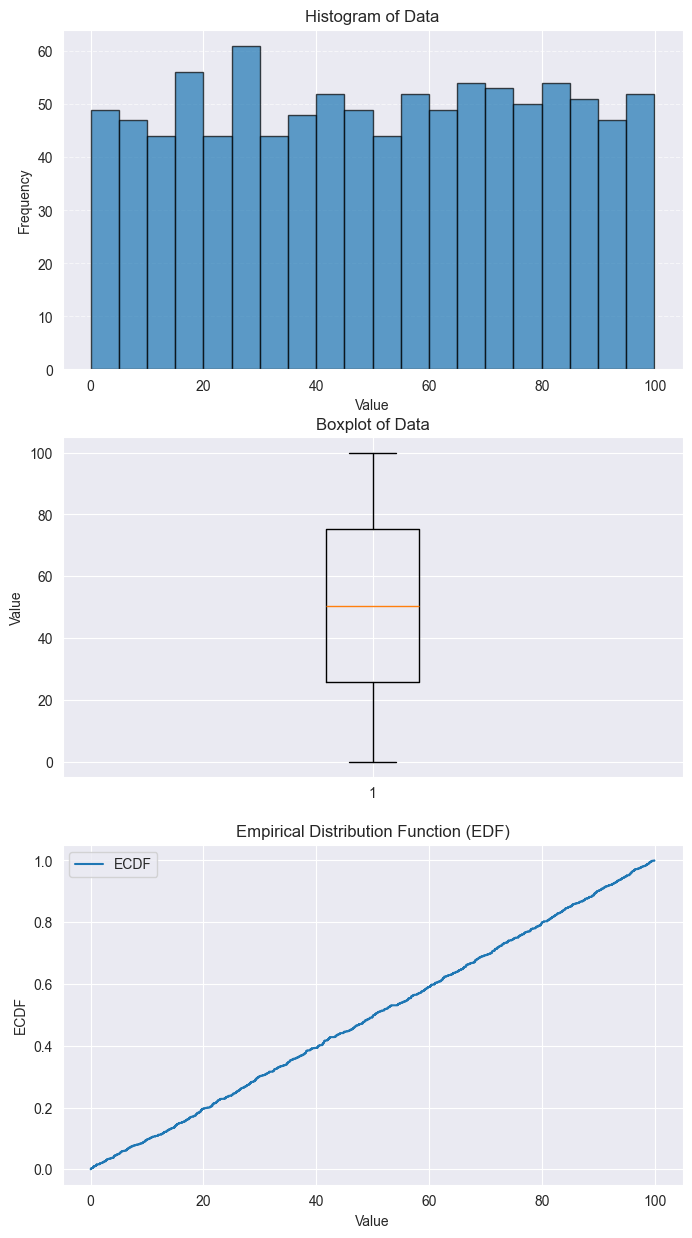

In [32]:
generate_graphs_for_data(random_doubles_mt)

In [35]:
# Auto-Correlation as a Matrix
# Build a 2D matrix of lagged values
X1 = np.vstack([random_doubles_lc[:-1], random_doubles_lc[1:]])
X2 = np.vstack([random_doubles_mt[:-1], random_doubles_mt[1:]])

# Compute correlation matrix
corr_matrix1 = np.corrcoef(X1)
corr_matrix2 = np.corrcoef(X2)

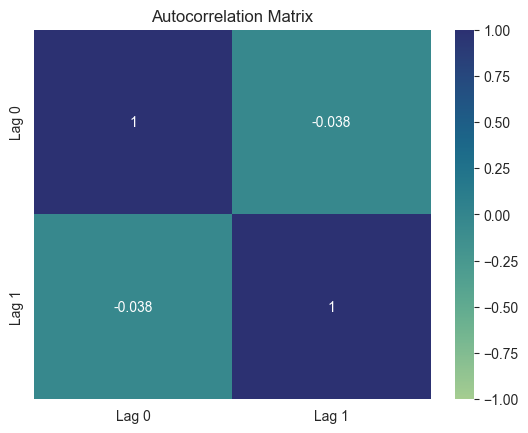

In [36]:
# Plot as heatmap
sns.heatmap(corr_matrix1, annot=True, cmap='crest', vmin=-1, vmax=1,
            xticklabels=["Lag 0", "Lag 1"], yticklabels=["Lag 0", "Lag 1"])
plt.title("Autocorrelation Matrix")
plt.show()

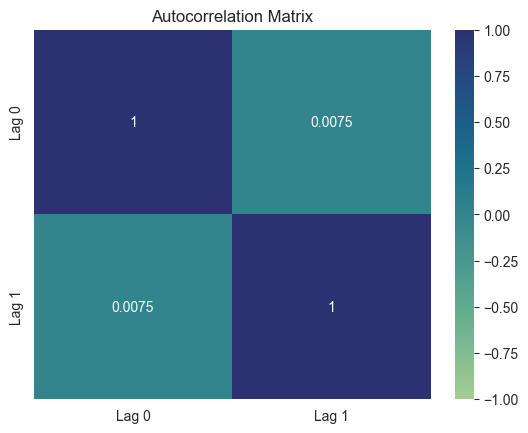

In [37]:
sns.heatmap(corr_matrix2, annot=True, cmap='crest', vmin=-1, vmax=1,
            xticklabels=["Lag 0", "Lag 1"], yticklabels=["Lag 0", "Lag 1"])
plt.title("Autocorrelation Matrix")
plt.show()